# Задание
**Цель**: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

**Описание задания:**

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта. https://www.cs.toronto.edu/~delve/data/adult/desc.html 

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке. http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html 

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

In [ ]:
data = pd.read_csv('/content/adult.csv') # датасет 
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Проведите первичный анализ.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

***Данные пропусков не имеют. Существует замещение некоторых строковых данных знаком вопроса.***


In [ ]:
for i in data.columns:
  print(i, data[i].unique())



age [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [226802  89814 336951 ... 129912 255835 257302]
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
educational-num [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport

In [ ]:
data[ (data['workclass'])=='?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
data[ (data['occupation'])=='?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Text(0.5, 1.0, 'Workclass Frequency')

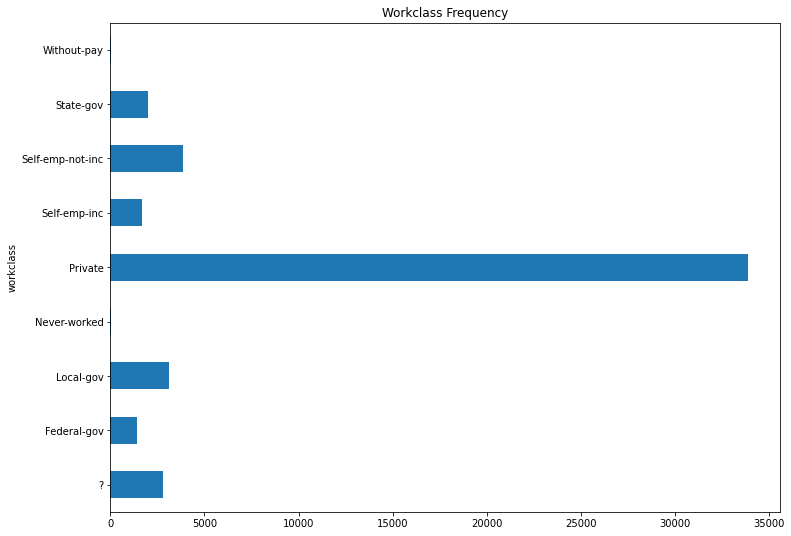

In [ ]:

data.groupby('workclass')['workclass'].count().plot(kind="barh",figsize=(12,9)).set_title('Workclass Frequency')

Text(0.5, 1.0, 'Occupation Frequency')

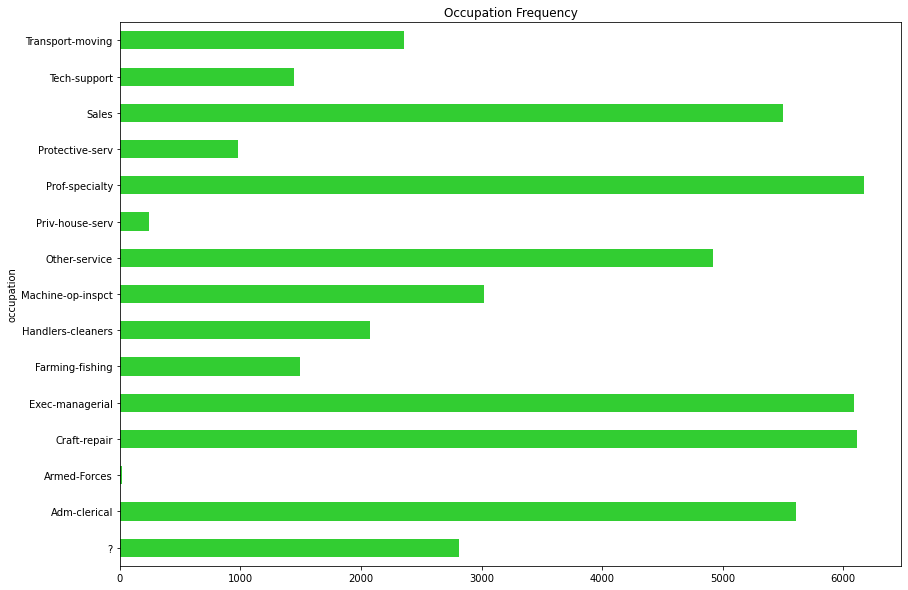

In [ ]:
data.groupby('occupation')['occupation'].count().plot(kind="barh",figsize=(14,10), color='limegreen').set_title('Occupation Frequency')

Преобразуйте категориальные признаки.

In [ ]:

selectedColumns = data [['age', 'occupation']]

# столбец sport - категориальная переменная (не путать с континуальными)
# переведем ее в значения 0 и 1, добавив столбцы с соответствующими названиями
X = pd.get_dummies (selectedColumns, columns = ['occupation'])


X.head()

,age,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies (data['income'], columns = ['income'])

,<=50K,>50K
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
48837,1,0
48838,0,1
48839,1,0
48840,1,0


In [ ]:
data['income']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit( data['income'])

LabelEncoder()

In [ ]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
le.transform( ['<=50K', '>50K']) # пример расшифровки


array([0, 1])

In [ ]:
le.inverse_transform([1, 0, 1])

array(['>50K', '<=50K', '>50K'], dtype=object)

In [ ]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series (data = le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

**Логистическая регрессия**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [ ]:
model = LogisticRegression()

Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
predictions[19:25] # посмотрим как выглядят наши предсказания

array([0, 0, 1, 0, 0, 0])

In [ ]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.91458443, 0.08541557],
       [0.8906128 , 0.1093872 ],
       [0.51598697, 0.48401303],
       ...,
       [0.68835828, 0.31164172],
       [0.86479685, 0.13520315],
       [0.4244422 , 0.5755578 ]])

In [ ]:
model.score(X_train, y_train) 

0.7687661556573593

In [ ]:
model.score(X_test,y_test)

0.7720339850547651

**Метод опорных векторов. SVM.**

In [ ]:
from sklearn.svm import SVC
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf.score(X_train, y_train) 

0.780641363601464

In [ ]:
clf.score(X_test, y_test)

0.7965009208103131

# Summary

1. Логистическая регрессия в данном случае показала чуть худшую продуктивность, но второй знак после запятой это не так значимо и можем пользоваться любым из двух методов.
2. Зависимость уровня дохода от возраста и рода занятий конечно присутствует, но можно поискать и другие наборы признаков, если нас интересует большая точность.
3. Метод опорныхвекторов интересен, но никак не уложу его математическую основу в голове, а трюки с ядрами значительно снижают самооценку((